# Predicting heart disease using machine learning 

* This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical report. 

We''re going to take the following approach: 
1. Problem definition 
2. Data 
3. Evaluation 
4. Features 
5. Modelling 
6. Experimentation 

## 1. Problem Definition 

In a statement ,
> Given clinical parameters about patient, can we predict whether or not they have heart disease ? 

## 2. Data 

Heart disease data : https://www.kaggle.com/johnsmith88/heart-disease-dataset

## 3. Evaluation 

> 95% accuracy at predicting whether or not a patient has heart disease during the proof of concep , we'll purse the project 

## 4. Features 

This will gives us the brief information about the data present in our working data set 

**create the data dictionary**
1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
   * 0: Typical angina: chest pain related decrease blood supply to the heart
   * 1: Atypical angina: chest pain not related to heart
   * 2: Non-anginal pain: typically esophageal spasms (non heart related)
   * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
   * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
   * serum = LDL + HDL + .2 * triglycerides
   * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
   * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
   * 0: Nothing to note
   * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
   * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute

## Preparing the tools 

we are going to use Pandas , Matplotlib and Numpy for data analysis and data manipulation

In [1]:
# Import all the tools we needed

# Regular EDA (exploratory data analysis) and plotting libs 
import pandas as pd 
import numpy as np 
%matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn as sns


# Model from scikit-learn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score , recall_score , f1_score
from sklearn.metrics import plot_roc_curve 

print("Imported successfully ")

Imported successfully 


## Load the data 

In [2]:
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data exploration (Exploratoy data analysis)

1. What questions are you trying to solve 
2. What data do you have and how do we treat different types?
3. What is missing from the data and how do you deal with it ? 
4. Where are the outliers and why should you care about them ?
5. How can you add change or remove features to get more out of your data ? 

In [3]:
plt.style.use('seaborn')

In [4]:
# Let's find out how many of each class there 
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

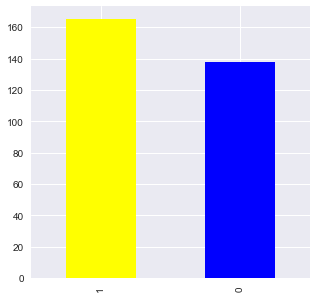

In [5]:
df["target"].value_counts().plot(kind = "bar" , color =["yellow","blue"],figsize =(5,5));

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Heart Disease Frequency according to Sex 

In [8]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [9]:
# Compare the sex column with target column 
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


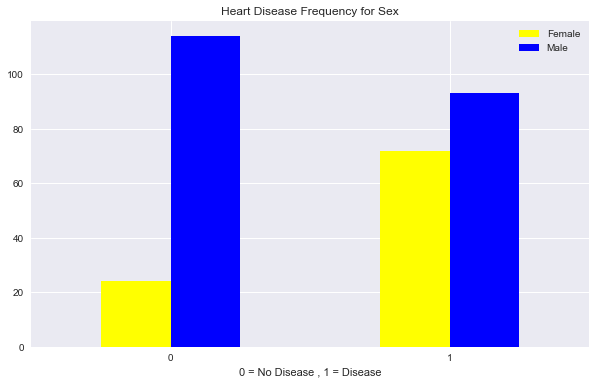

In [10]:
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize =(10,6),
                                  color=["yellow","blue"]);

plt.title("Heart Disease Frequency for Sex");
plt.xlabel("0 = No Disease , 1 = Disease");
plt.legend(["Female","Male"]);
plt.xticks(rotation = 0);

### Age vs. Max Heart Rate for Heart Disease 

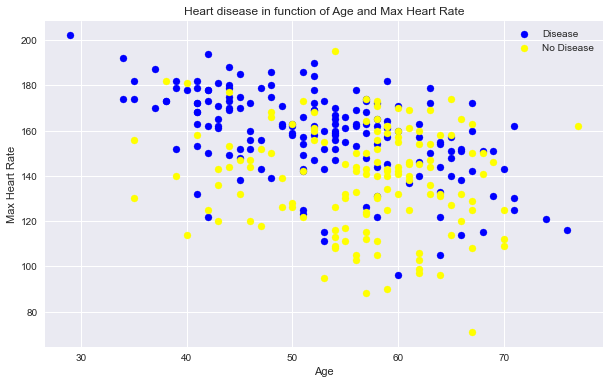

In [11]:
# create the figure 
plt.figure(figsize = (10,6))

# scatter plot for the positive values 
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
            c = "blue");

# scatter plot for negative values 
plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
            c = "yellow");

# Add some info 
plt.title("Heart disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"]);

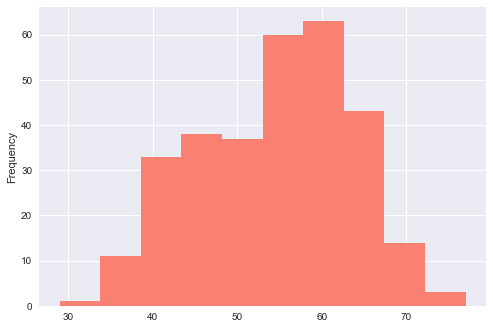

In [12]:
# Check the distribution of the age column with a histogram 
df.age.plot(kind = "hist",color = "salmon");

### Heart Disease Frequency per Chest Pain Type 
3.cp - chest pain type 
* 0: Typical angina: chest pain related decrease blood supply ot the heart
* 1: Atypical angina: chest pain not related to heart 
* 2: Non-anginal pain: typically esophageal spasms (not heart related )
* 3: Asysptomatic: Chest pain not showing signs of disease 
        
        

In [13]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


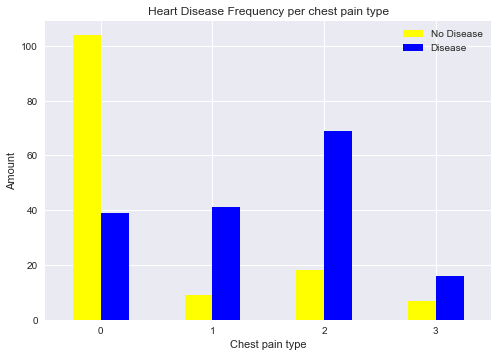

In [14]:
pd.crosstab(df.cp,df.target).plot(kind="bar",color=["yellow","blue"]);

plt.title("Heart Disease Frequency per chest pain type")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);

In [15]:
# Make correlation matrix 
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


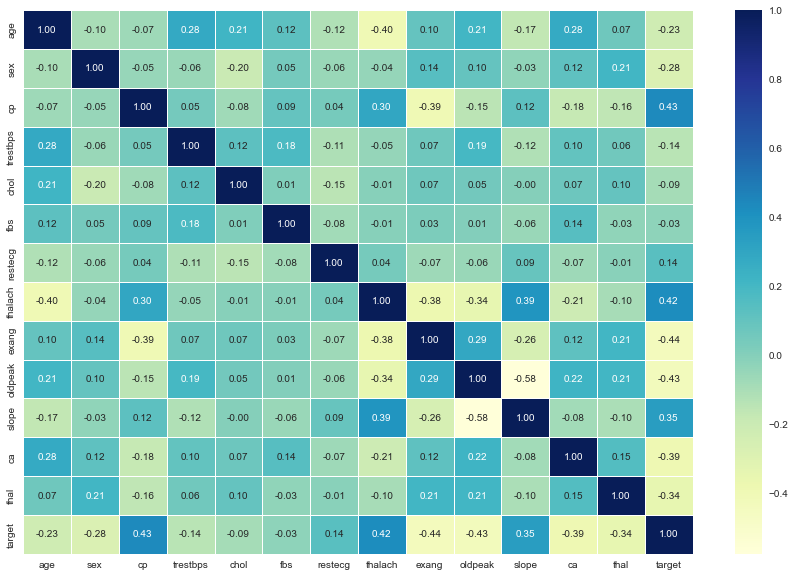

In [16]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidth=1,
                 fmt=".2f",
                 cmap="YlGnBu");

  ## 5. Modeling 

In [17]:
# split the data into x and y 
X = df.drop("target", axis = 1)

y = df["target"]

In [18]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [19]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [20]:
# split the data into train and test sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [21]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [22]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

It's time to build the  machine learning model 
1. train it using training set (find the patterns)
2. test it using test set (use the patterns)

We are going tp try three different machine learning model 
1. Logistic Regression
2. K-Nearest Neighbours classifier 
3. Random Forest Classifier 

In [40]:
# put model in dictionary
models = {"LogisticRegression" : LogisticRegression() , 
          "K-Nearest Neighbours classifier" : KNeighborsClassifier() ,
          "Random Forest Classifier" : RandomForestClassifier() }


def fit_and_score(models , X_train, X_test, y_train, y_test):
    """
    Fit and Evaluate the given machine learning models 
    models : a dict of different scikit-lesarn machine learning models 
    X_train : Training data set 
    X_test : testing data 
    y_train : training labels
    y_test : testing labels
    """
    np.random.seed(42)
    
    # make dict to keep model score 
    model_score ={} 
    
    for name , model in models.items():
        # fit the model to the data  
        clf = model
        
        clf.fit(X_train,y_train)
        #Evalue the model 
        score = clf.score(X_test,y_test)
        # append the score to model_score dict 
        model_score[name] = score
    return model_score 

In [41]:
model_score = fit_and_score(models ,X_train,X_test,y_train,y_test)

C:\Users\Shree\OneDrive\Desktop\MACHINE_LEARNING_DATA_SCIENCE\Heart_disease_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
model_score

{'LogisticRegression': 0.8852459016393442,
 'K-Nearest Neighbours classifier': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918}

### Model Comparison 

In [48]:
model_compare = pd.DataFrame(model_score,index =["accuracy"])
model_compare

,LogisticRegression,K-Nearest Neighbours classifier,Random Forest Classifier
accuracy,0.885246,0.688525,0.836066


In [55]:
model_compare.T

,accuracy
LogisticRegression,0.885246
K-Nearest Neighbours classifier,0.688525
Random Forest Classifier,0.836066


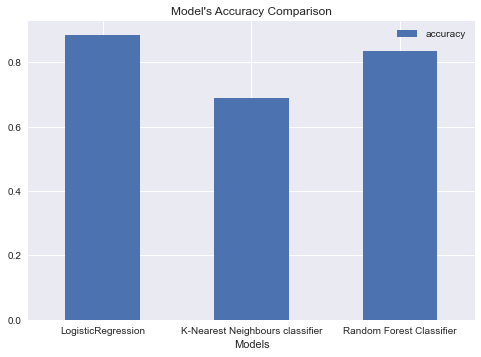

In [70]:
model_compare.T.plot(kind = "bar")
plt.title("Model's Accuracy Comparison")
plt.xlabel("Models")
plt.xticks(rotation = 0);

Let's look at the folllowing 

* Hyperparameter Tuning 
* Feature importance 
* Confusion matrix 
* Cross-validation 
* Precision
* Recall 
* f1-score 
* Classification Report 
* ROC Curve 
* Area under the curve (AUC)

### Hyperparameter Tuning ( by hand )

In [63]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [67]:
# Tune KNN

train_score =[]
test_score =[]

# Create a list for different value of K-neighbours 
neighbours = range(1,21)

# setup KNN instance 
knn = KNeighborsClassifier()

# Loop through different n_neighbours 
for i in neighbours:
    knn.set_params(n_neighbors=i)
    # fit the algo 
    knn.fit(X_train,y_train)
    
    # Update the training scores list 
    train_score.append(knn.score(X_train,y_train))
    
    # Update the test scores list 
    test_score.append(knn.score(X_test,y_test))

In [78]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [79]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data is 75.41%


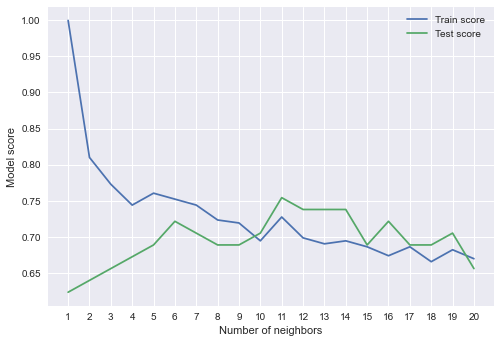

In [85]:
plt.plot(neighbours,train_score,label ="Train score")
plt.plot(neighbours,test_score,label ="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data is {max(test_score)*100:.2f}%")

### Hyperparameter Tuning ( RandomizedSearchCV )

We are going to tune
* LogisticRegression model()
* Random Forest Classifier()
...using **RandomizedSearchCV**

In [92]:
#  Create hyperparameter grid for LogisticRegression 
log_reg_grid = {"C":np.logspace(-4,4,20),
                "solver" :["liblinear"]
                }

# Create hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators":np.arange(10,1000,50),
           "max_depth": [None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)}

In [93]:
# Tune Logistic Regression 

np.random.seed(42)

# setup random hyperparameter search for LogisticRegression 
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose = True)

# Fit random hyperparametr search model for Logistic Regression 
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [94]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [95]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [96]:
# Tune Random Forest Classifier 

np.random.seed(42)

# setup random hyperparameter search for Random Forest Classifier 
rs_rf= RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv= 5,
                          n_iter =20,
                          verbose = True)
# Fit random hyperparametr search model for Random Forest Classifier 
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [97]:
# Find the best hyperparameters 
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [98]:
rs_rf.score(X_test,y_test)

0.8688524590163934

### Hyperparameter Tuning ( GridSearchCV )

Since our Logistic Regression model provides the best scores so far , we will try  to improve the score using GridSearchCV

In [100]:
#  Create hyperparameter grid for LogisticRegression 
log_reg_grid = {"C":np.logspace(-4,4,30),
                "solver" :["liblinear"]
                }

np.random.seed(42)

# setup random hyperparameter search for LogisticRegression 
gs_log_reg = GridSearchCV(LogisticRegression(),
                                param_grid=log_reg_grid,
                                cv = 5, 
                                verbose = True)

# fit grid hyperparameter search model 
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [102]:
#check the best parameter 
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [103]:
#  Evalte the grid search logistic regression model 
gs_log_reg.score(X_test,y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier , beyond accuracy 

* ROC curve and AUC score 
* Confusion matrix 
* Classsification Report 
* Precision 
* Recall 
* F1-score 

.... and it would be great if crosss validaton was used where possible .

To make comaprisons and evaluate our trained mdoel , first we need to make predications 


In [107]:
y_pred = gs_log_reg.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [108]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

### ROC curve and AUS score 

C:\Users\Shree\OneDrive\Desktop\MACHINE_LEARNING_DATA_SCIENCE\Heart_disease_project\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


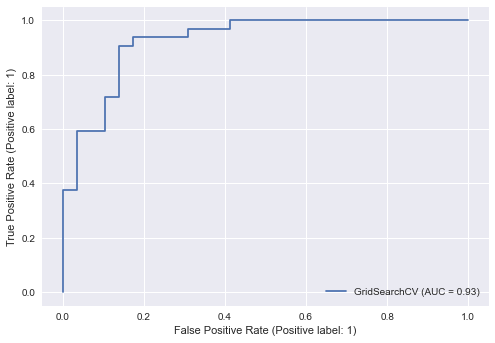

In [114]:
# Import ROC curve function 

# plot ROC curve and calculate AUC metric 

plot_roc_curve(gs_log_reg,X_test,y_test);

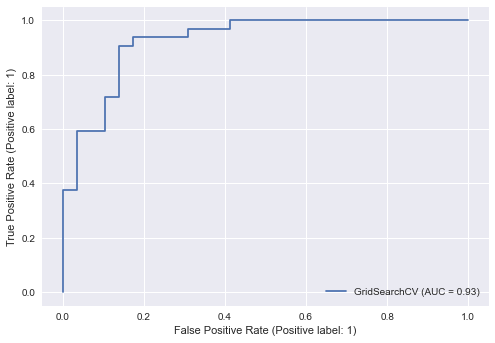

In [115]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(gs_log_reg,X_test,y_test);

### Confusion Matrix 

In [117]:
# Confusion metrics 
print(confusion_matrix(y_test,y_pred))

[[25  4]
 [ 3 29]]


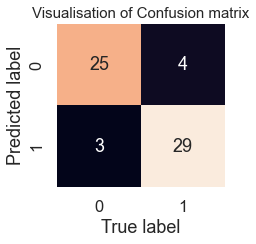

In [127]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_pred):
    """
    Plot confusion matrics using seaborn heatmap 
    """
    fig,ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_pred),
                     annot = True,
                     cbar = False)
    
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    plt.title("Visualisation of Confusion matrix",fontsize=15);
    
plot_conf_mat(y_test,y_pred)

let's get a classification report as well as cross-validated precision , recall and f1-score 

### Classification Report 

In [128]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation 

we're going to calculate precision , recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()` .


In [130]:
# check the best hyper parameter 
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [132]:
# Create the new classifier with best parameters 
clf = LogisticRegression(C=0.20433597178569418 ,
                   solver='liblinear')
clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [139]:
from sklearn.model_selection import cross_val_score

# cross-validated accuracy
cv_acc = cross_val_score(clf,X,y,scoring='accuracy')
cv_acc = cv_acc.mean()
cv_acc

0.8446994535519124

In [140]:
# cross-validated precision 
cv_precision = cross_val_score(clf,X,y,scoring="precision")
cv_precision = cv_precision.mean()
cv_precision

0.8207936507936507

In [142]:
# cross-validated recall 
cv_recall = cross_val_score(clf,X,y,scoring="recall")
cv_recall = cv_recall.mean()
cv_recall

0.9212121212121213

In [144]:
# cross-validated f1_score 
cv_f1_score = cross_val_score(clf,X,y,scoring="f1")
cv_f1_score = cv_f1_score.mean()
cv_f1_score

0.8673007976269721

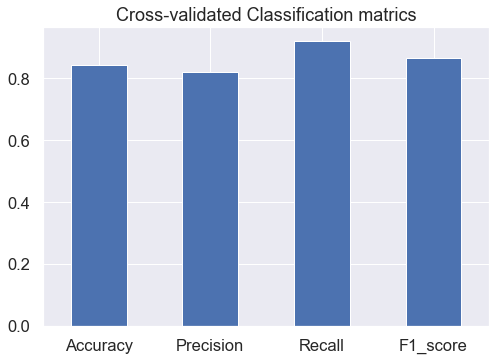

In [162]:
# Visulize cross-validated matrics 
cv_metrics = pd.DataFrame({"Accuracy" : cv_acc , 
                           "Precision" : cv_precision,
                           "Recall":cv_recall,
                           "F1_score":cv_f1_score},
                           index = ["Value"])
cv_metrics.T.plot(kind ="bar" , legend = False )
plt.title("Cross-validated Classification matrics")
plt.xticks(rotation =0);


### Feature Importance 

Feature importance is another as asking , "which features contributed most to the outcomes of the model and how did they contributes ?"

Finding feature importance is different for each machine learning model 

In [163]:
# feature importance for Logistics Regression 

gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [166]:
clf = LogisticRegression(C=0.20433597178569418 , solver = 'liblinear')
clf.fit(X_train,y_train);

In [168]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [167]:
# Check coef
clf.coef_

array([[ 0.00316728, -0.86044619,  0.6606706 , -0.01156993, -0.00166374,
         0.04386123,  0.31275813,  0.02459361, -0.60413061, -0.56862832,
         0.45051624, -0.63609879, -0.67663383]])

In [179]:
# Match coef's of features to columns 
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672769574500135,
 'sex': -0.8604461876509621,
 'cp': 0.6606705956911073,
 'trestbps': -0.011569931563712749,
 'chol': -0.0016637424209784567,
 'fbs': 0.04386123481544026,
 'restecg': 0.3127581278171948,
 'thalach': 0.02459361107844528,
 'exang': -0.6041306062020464,
 'oldpeak': -0.5686283181245352,
 'slope': 0.4505162370054866,
 'ca': -0.6360987949056705,
 'thal': -0.6766338344951353}

In [180]:
# Visualize features importance 
feature_df = pd.DataFrame(feature_dict,index = [0] )
feature_df.T


,0
age,0.003167
sex,-0.860446
cp,0.660671
trestbps,-0.011570
chol,-0.001664
fbs,0.043861
restecg,0.312758
thalach,0.024594
exang,-0.604131
oldpeak,-0.568628


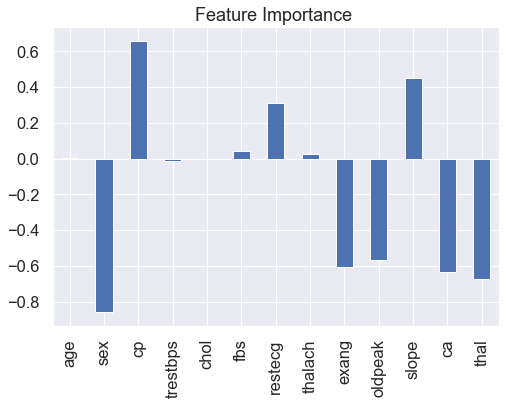

In [181]:
feature_df.T.plot(kind= "bar" , legend =False , title ="Feature Importance ");


## 6. Experimentation 

If you haven't hit the evaluating metrics yet ... ask yourself...

* Could you collect more data ? 
* Could you try a better model ? Like Catboost or XGBoost?
* Could you improve the current models? ( beyond what we have done so far )
* If your model is good enough ( you have hit the required value of evaluation metrics ) how would you export it and share it with others ? 

